In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('final_data.csv', delimiter=';')
data.head(5)

,Unnamed: 0,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [ ]:
data.address[0]

'Address: 1160 Mission Street #2007'

In [ ]:
data.shape

(11330, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   z_address      11330 non-null  object 
 3   bathrooms      11330 non-null  float64
 4   bedrooms       11330 non-null  float64
 5   finishedsqft   11211 non-null  float64
 6   lastsolddate   11330 non-null  object 
 7   lastsoldprice  11330 non-null  float64
 8   latitude       11315 non-null  float64
 9   longitude      11315 non-null  float64
 10  neighborhood   11330 non-null  object 
 11  totalrooms     11281 non-null  float64
 12  usecode        11290 non-null  object 
 13  yearbuilt      11330 non-null  float64
 14  zestimate      11330 non-null  float64
 15  zindexvalue    11330 non-null  object 
 16  zipcode        11330 non-null  float64
 17  zpid           11330 non-null  float64
dtypes: flo

Будем использовать линейную регрессию для тестирования качества данных

In [ ]:
def get_score(X,y, random_seed=42, model=None):
  if model is None:
    model = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

Для поиска выбросов будем использовать boxplot, pairplot

In [ ]:
def get_boxplot(X, columns=[]):
  for i in columns:
    sns.boxplot(x=X[i])
  pass  

def get_pairplot(X, columns=None):
  if columns is None:
    columns = list(X.columns)
  sns.pairplot(X[columns])
  pass    

Для заполнения пропущенных значений будем использовать стандартные способы
- заполнение значением
- max
- min
- mode
- median
- mean
- метод индикатора
- линейная регрессия

In [ ]:
def get_value(X, column, mode='mean', value=0, columns_for_reg=None):
  if mode == 'value':
    X.loc[X[X[column].isna()].index ,column] = value
  elif mode == 'max':
    X.loc[X[X[column].isna()].index ,column] = X[column].max()
  elif mode == 'min':
    X.loc[X[X[column].isna()].index ,column] = X[column].min()
  elif mode == 'median':
    X.loc[X[X[column].isna()].index ,column] = X[column].median()    
  elif mode == 'mode':
    X.loc[X[X[column].isna()].index, column] = X[column].mode()[0]  
  elif mode == 'indicator':
    X['ind_'+str(column)] = 0
    X.loc[X[X[column].isna()].index, 'ind_'+str(column)] = 1
    X.loc[X[X[column].isna()].index, column] = value 
  elif mode == 'linreg':
    if columns_for_reg is None:
      cols = list(X.select_dtypes([np.number]).columns) 
      cols.remove(column)
    else:
      cols = columns_for_reg  
    X_tmp = X.dropna()  
    m = LinearRegression().fit(X_tmp[cols], X_tmp[column])
    X.loc[X[X[column].isna()].index, column] = m.predict(X[X[column].isna()][cols])
  else:
    X.loc[X[X[column].isna()].index, column] = X[column].mean()
  return X  


### Заполнение пропущенных данных 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   z_address      11330 non-null  object 
 3   bathrooms      11330 non-null  float64
 4   bedrooms       11330 non-null  float64
 5   finishedsqft   11211 non-null  float64
 6   lastsolddate   11330 non-null  object 
 7   lastsoldprice  11330 non-null  float64
 8   latitude       11315 non-null  float64
 9   longitude      11315 non-null  float64
 10  neighborhood   11330 non-null  object 
 11  totalrooms     11281 non-null  float64
 12  usecode        11290 non-null  object 
 13  yearbuilt      11330 non-null  float64
 14  zestimate      11330 non-null  float64
 15  zindexvalue    11330 non-null  object 
 16  zipcode        11330 non-null  float64
 17  zpid           11330 non-null  float64
dtypes: flo

In [ ]:
data.describe()

,Unnamed: 0,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zipcode,zpid
count,11330.000000,11330.000000,11330.000000,11211.000000,1.133000e+04,11315.000000,11315.000000,11281.000000,11330.000000,1.133000e+04,11330.000000,1.133000e+04
mean,9171.729214,1.980229,2.614475,1586.081349,1.263928e+06,37.759715,-122.436508,6.113997,1948.498147,1.565695e+06,94116.912004,3.689973e+07
std,4921.941074,1.047358,1.299457,922.815803,1.042079e+06,0.025583,0.030742,12.151195,37.911196,1.229417e+06,9.400877,7.800741e+07
min,2.000000,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,94102.000000,1.506329e+07
25%,5039.750000,1.000000,2.000000,1019.000000,7.292500e+05,37.739284,-122.455149,4.000000,1916.000000,9.052375e+05,94110.000000,1.510847e+07
50%,9198.500000,2.000000,2.000000,1362.000000,9.900000e+05,37.760514,-122.432510,5.000000,1940.000000,1.230758e+06,94115.000000,1.515697e+07
75%,13374.750000,2.000000,3.000000,1878.000000,1.450000e+06,37.781386,-122.413353,7.000000,1986.000000,1.731170e+06,94123.000000,5.970040e+07
max,17632.000000,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,1.553325e+07,94158.000000,2.146999e+09


In [ ]:
# расчет качества модели пр R2-score
# baseline = 0.8275249613455236

In [ ]:
cols = ['bathrooms', 'bedrooms',	'finishedsqft',	'lastsoldprice',	'latitude',	'longitude',
        'totalrooms',	'yearbuilt']
target = 'zestimate'
get_score(data.dropna()[cols], data.dropna()[target])

0.8275249613455236

In [ ]:
# Unnamed: 0 - удаляем

In [ ]:
data['Unnamed: 0'].value_counts(dropna=False)

2047     1
11631    1
15693    1
13644    1
5448     1
        ..
6862     1
2764     1
13003    1
15050    1
16384    1
Name: Unnamed: 0, Length: 11330, dtype: int64

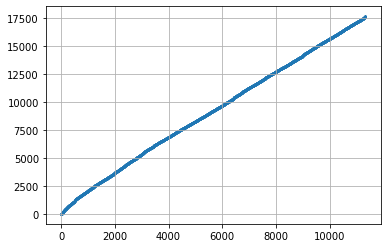

In [ ]:
plt.scatter(data.index, data['Unnamed: 0'], s=1)
plt.grid()

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data.columns

Index(['address', 'z_address', 'bathrooms', 'bedrooms', 'finishedsqft',
       'lastsolddate', 'lastsoldprice', 'latitude', 'longitude',
       'neighborhood', 'totalrooms', 'usecode', 'yearbuilt', 'zestimate',
       'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

In [ ]:
# zindexvalue, zpid - удаляем

In [ ]:
data.drop(columns=['zindexvalue', 'zpid'], inplace=True)

In [ ]:
data.columns

Index(['address', 'z_address', 'bathrooms', 'bedrooms', 'finishedsqft',
       'lastsolddate', 'lastsoldprice', 'latitude', 'longitude',
       'neighborhood', 'totalrooms', 'usecode', 'yearbuilt', 'zestimate',
       'zipcode'],
      dtype='object')

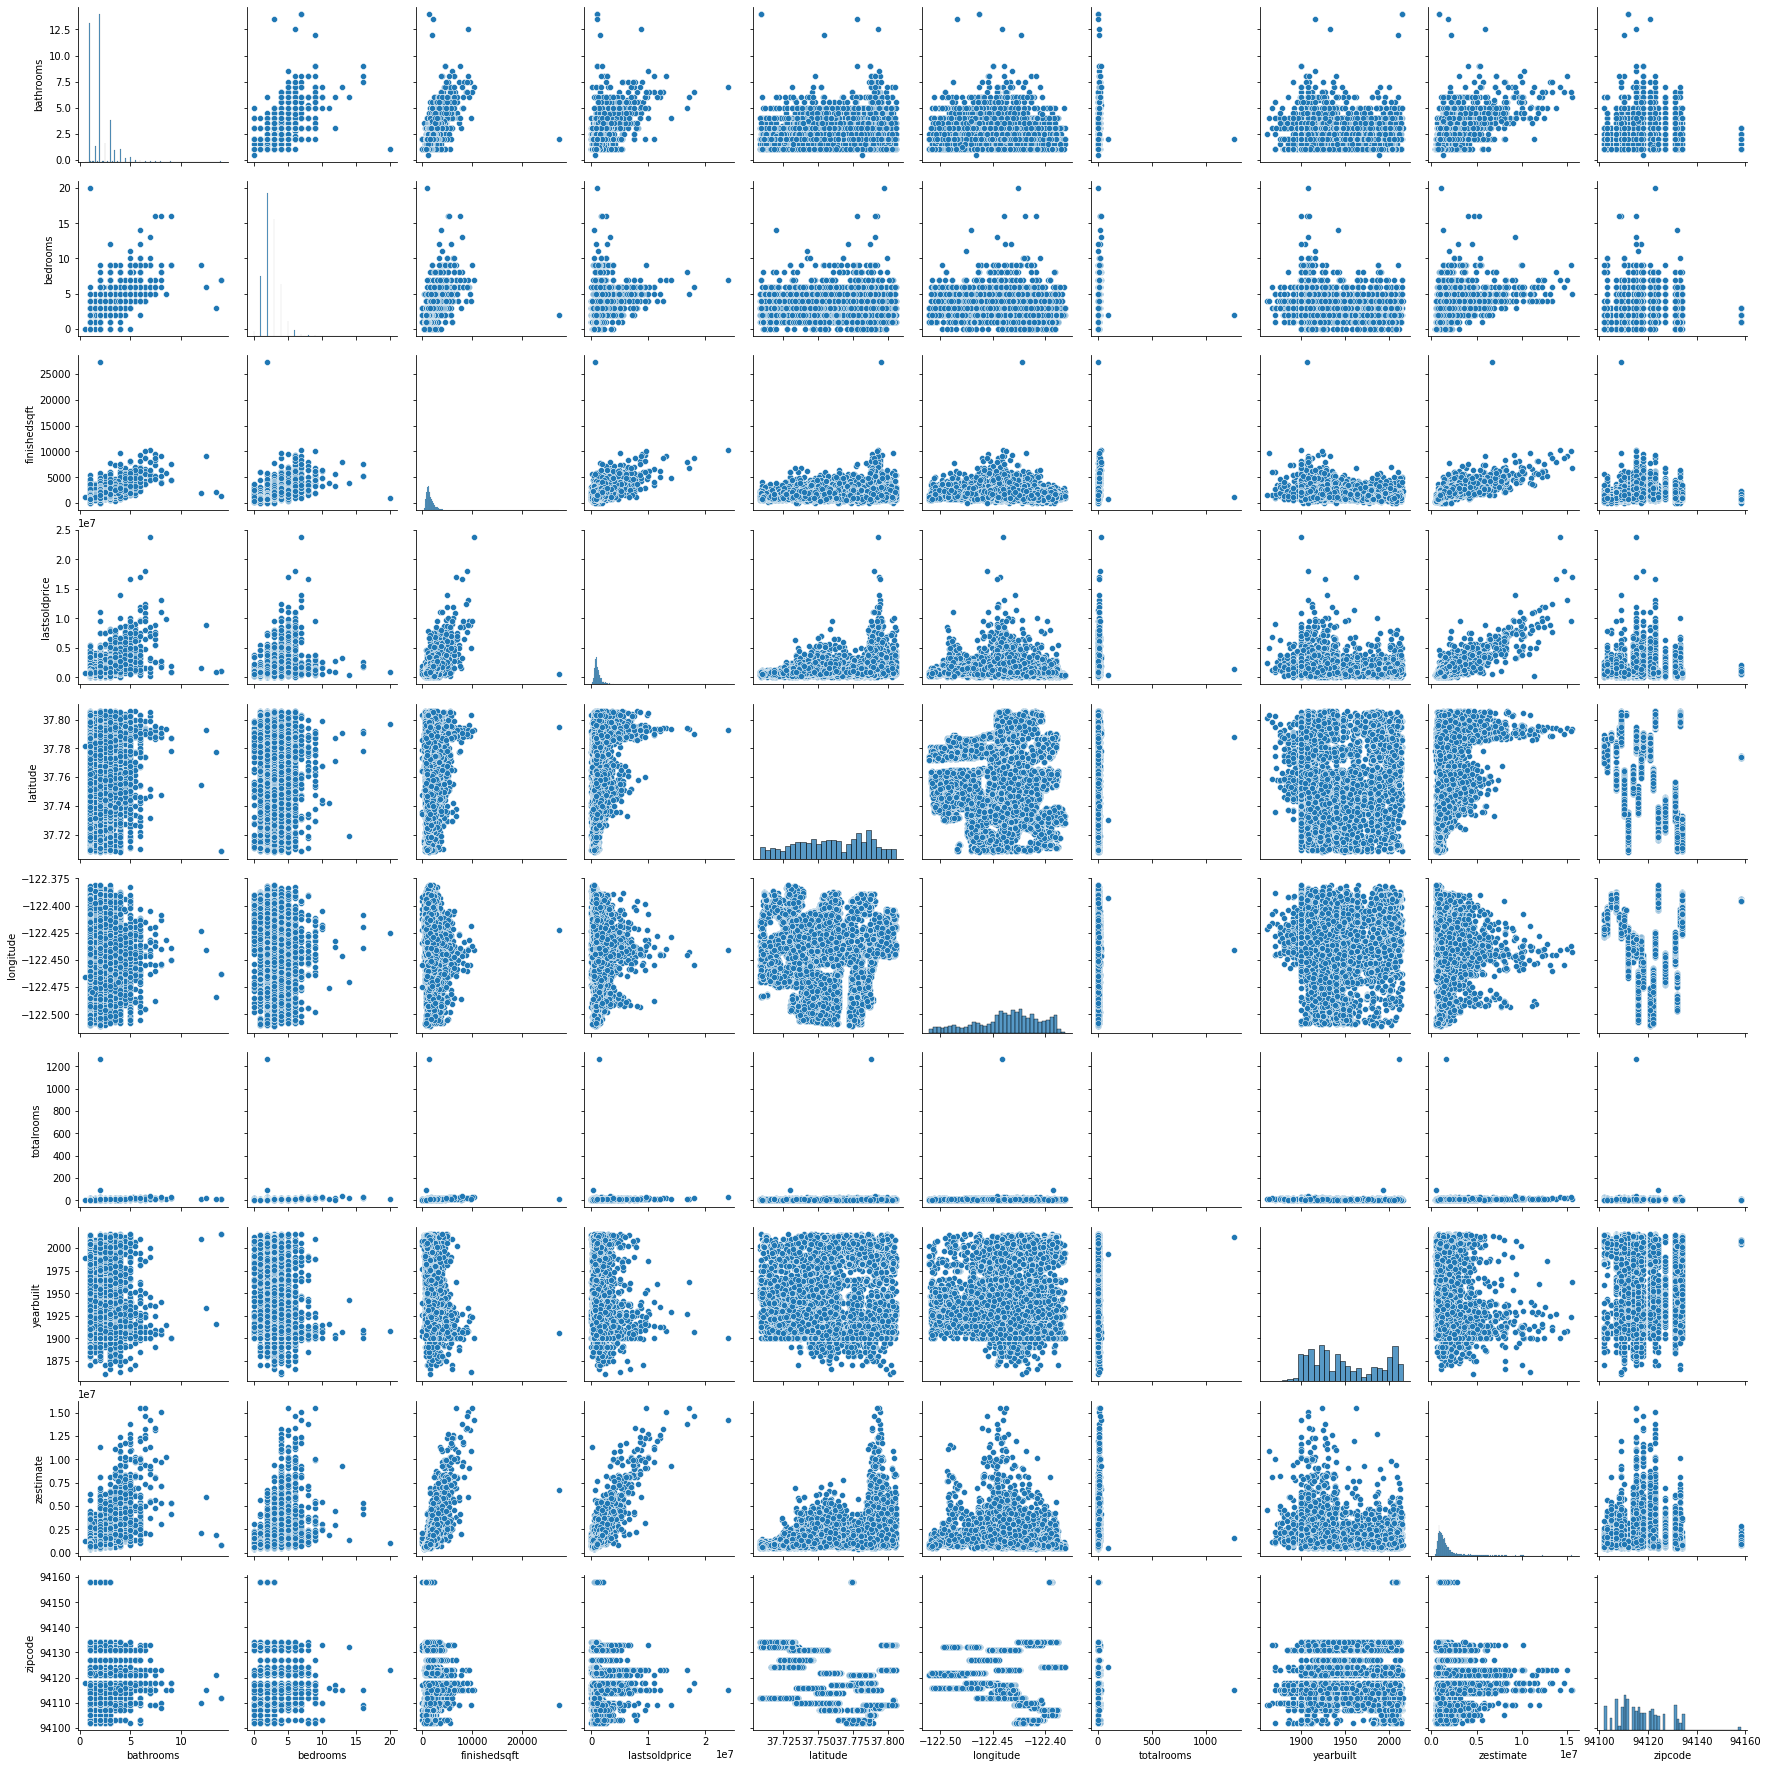

In [ ]:
get_pairplot(data)

In [ ]:
# finishedsqft

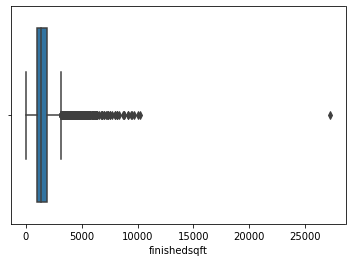

In [ ]:
get_boxplot(data, columns=['finishedsqft'])

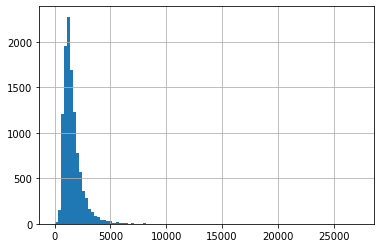

In [ ]:
data['finishedsqft'].hist(bins=100)

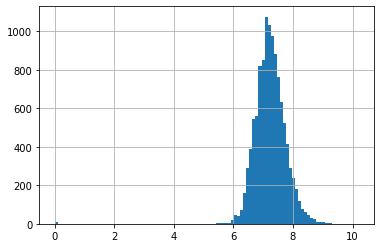

In [ ]:
_ = plt.hist(np.log(data['finishedsqft'].to_numpy()), bins=100)
plt.grid()

In [ ]:
data['finishedsqft'].to_numpy()

array([1043.,  903., 1425., ...,  875.,  697., 1539.])

In [ ]:
data[data['finishedsqft'] > 15000]

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zipcode
4997,Address: 1645 Pacific Avenue,1645 Pacific Ave,2.0,2.0,27275.0,03/31/2015,600000.0,37.794658,-122.422325,Nob Hill,6.0,Condominium,1906.0,6754185.0,94109.0


In [ ]:
data.shape

(11330, 15)

In [ ]:
data = data[(data['finishedsqft'] < 15000) | (data['finishedsqft'].isna())]

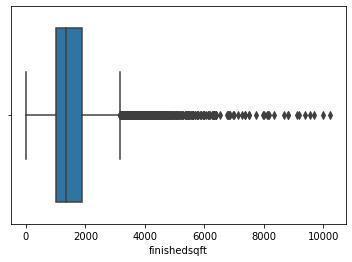

In [ ]:
get_boxplot(data, columns=['finishedsqft'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11329 entries, 0 to 11329
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11329 non-null  object 
 1   z_address      11329 non-null  object 
 2   bathrooms      11329 non-null  float64
 3   bedrooms       11329 non-null  float64
 4   finishedsqft   11210 non-null  float64
 5   lastsolddate   11329 non-null  object 
 6   lastsoldprice  11329 non-null  float64
 7   latitude       11314 non-null  float64
 8   longitude      11314 non-null  float64
 9   neighborhood   11329 non-null  object 
 10  totalrooms     11280 non-null  float64
 11  usecode        11289 non-null  object 
 12  yearbuilt      11329 non-null  float64
 13  zestimate      11329 non-null  float64
 14  zipcode        11329 non-null  float64
dtypes: float64(10), object(5)
memory usage: 1.4+ MB


In [ ]:
data = get_value(data,'finishedsqft',mode='linreg', 
          columns_for_reg=['bathrooms', 'bedrooms', 'lastsoldprice', 'latitude', 'longitude','yearbuilt'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11329 entries, 0 to 11329
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11329 non-null  object 
 1   z_address      11329 non-null  object 
 2   bathrooms      11329 non-null  float64
 3   bedrooms       11329 non-null  float64
 4   finishedsqft   11329 non-null  float64
 5   lastsolddate   11329 non-null  object 
 6   lastsoldprice  11329 non-null  float64
 7   latitude       11314 non-null  float64
 8   longitude      11314 non-null  float64
 9   neighborhood   11329 non-null  object 
 10  totalrooms     11280 non-null  float64
 11  usecode        11289 non-null  object 
 12  yearbuilt      11329 non-null  float64
 13  zestimate      11329 non-null  float64
 14  zipcode        11329 non-null  float64
dtypes: float64(10), object(5)
memory usage: 1.7+ MB


In [ ]:
get_score(data.dropna()[cols], data.dropna()[target])

0.8578108151340197

In [ ]:
#latitude, longitude

In [ ]:
set(data[data['latitude'].isna()].index) - set(data[data['longitude'].isna()].index)

set()

In [ ]:
set(data[data['latitude'].isna()]['z_address']) & set(data[~data['latitude'].isna()]['z_address'])

{'1015 Ashbury St APT 2', '1566 27th Ave', '5853 Mission St APT 4'}

In [ ]:
data[data['z_address'] == '1015 Ashbury St APT 2'].shape[0] 

4

In [ ]:
#tmp_data = data.copy()
data = tmp_data.copy()

In [ ]:
for i, el in data[data['latitude'].isna()].iterrows():
  cur_el = data[(~data['latitude'].isna())&(data['z_address'] == el['z_address'])]
  if cur_el.shape[0] > 0:
    print(cur_el.iloc[0]['latitude'],cur_el.iloc[0]['longitude'])
    data.loc[i, 'latitude'] = cur_el.iloc[0]['latitude']
    data.loc[i, 'longitude'] = cur_el.iloc[0]['longitude']


37.758228 -122.485022
37.70881 -122.45142299999999
37.76432 -122.44634199999999


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11329 entries, 0 to 11329
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11329 non-null  object 
 1   z_address      11329 non-null  object 
 2   bathrooms      11329 non-null  float64
 3   bedrooms       11329 non-null  float64
 4   finishedsqft   11329 non-null  float64
 5   lastsolddate   11329 non-null  object 
 6   lastsoldprice  11329 non-null  float64
 7   latitude       11317 non-null  float64
 8   longitude      11317 non-null  float64
 9   neighborhood   11329 non-null  object 
 10  totalrooms     11280 non-null  float64
 11  usecode        11289 non-null  object 
 12  yearbuilt      11329 non-null  float64
 13  zestimate      11329 non-null  float64
 14  zipcode        11329 non-null  float64
dtypes: float64(10), object(5)
memory usage: 1.7+ MB


In [ ]:
data['zipcode'].unique().shape

(25,)

In [ ]:
data['neighborhood'].unique().shape

(71,)

In [ ]:
get_score(data.dropna()[cols], data.dropna()[target])

0.8578108151340197

In [ ]:
data_long_lat = data.groupby(['zipcode', 'neighborhood']).agg({'latitude':'median', 'longitude':'median'}).reset_index()


In [ ]:
data_long_lat.head()

,zipcode,neighborhood,latitude,longitude
0,94102.0,Downtown,37.786190,-122.407630
1,94102.0,Hayes Valley,37.772243,-122.426551
2,94102.0,Van Ness - Civic Center,37.781386,-122.421406
3,94103.0,Mission,37.766736,-122.421846
4,94103.0,South of Market,37.775993,-122.411809


In [ ]:
for i, el in data[data['latitude'].isna()].iterrows():
    data.loc[i, 'latitude'] = data_long_lat[(data_long_lat['zipcode'] == el['zipcode'])&(data_long_lat['neighborhood'] == el['neighborhood'])]['latitude'].values[0]
    data.loc[i, 'longitude'] = data_long_lat[(data_long_lat['zipcode'] == el['zipcode'])&(data_long_lat['neighborhood'] == el['neighborhood'])]['longitude'].values[0]
    

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11329 entries, 0 to 11329
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11329 non-null  object 
 1   z_address      11329 non-null  object 
 2   bathrooms      11329 non-null  float64
 3   bedrooms       11329 non-null  float64
 4   finishedsqft   11329 non-null  float64
 5   lastsolddate   11329 non-null  object 
 6   lastsoldprice  11329 non-null  float64
 7   latitude       11329 non-null  float64
 8   longitude      11329 non-null  float64
 9   neighborhood   11329 non-null  object 
 10  totalrooms     11280 non-null  float64
 11  usecode        11289 non-null  object 
 12  yearbuilt      11329 non-null  float64
 13  zestimate      11329 non-null  float64
 14  zipcode        11329 non-null  float64
dtypes: float64(10), object(5)
memory usage: 1.7+ MB


In [ ]:
get_score(data.dropna()[cols], data.dropna()[target])

0.8406653997830322

In [ ]:
# totalrooms

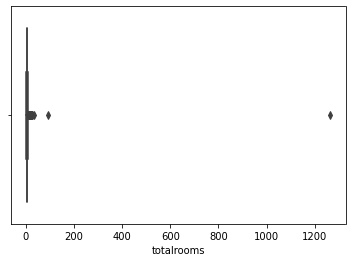

In [ ]:
get_boxplot(data, ['totalrooms'])

In [ ]:
data[data['totalrooms'] > 30 ]

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zipcode
8300,Address: 5264 3rd Street #304,5264 3rd St APT 304,2.0,2.0,805.0,07/18/2013,325000.0,37.729825,-122.392825,Bayview,94.0,Condominium,1993.0,502285.0,94124.0
8967,Address: 2829 California Street #3C,2829 California St APT 3C,2.0,2.0,1264.0,03/14/2013,1375000.0,37.787654,-122.440902,Lower Pacific Heights,1264.0,Condominium,2012.0,1591608.0,94115.0
11175,Address: 3101 Jackson Street,3101 Jackson St,7.0,13.0,7957.0,03/16/2007,3350000.0,37.790849,-122.446267,Pacific Heights,33.0,MultiFamily2To4,1907.0,9304469.0,94115.0


In [ ]:
data = data[(data['totalrooms'] < 75 ) | (data['totalrooms'].isna())]

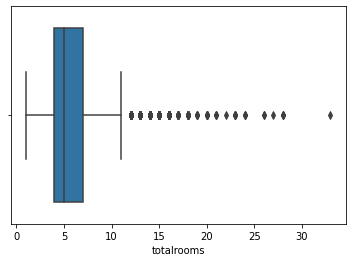

In [ ]:
get_boxplot(data, ['totalrooms'])

In [ ]:
data.shape

(11327, 15)

In [ ]:
data = get_value(data,'totalrooms',mode='linreg', 
          columns_for_reg=['bathrooms', 'bedrooms', 'lastsoldprice','yearbuilt','finishedsqft'])

In [ ]:

get_score(data.dropna()[cols], data.dropna()[target])

0.838839092550982

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11327 entries, 0 to 11329
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11327 non-null  object 
 1   z_address      11327 non-null  object 
 2   bathrooms      11327 non-null  float64
 3   bedrooms       11327 non-null  float64
 4   finishedsqft   11327 non-null  float64
 5   lastsolddate   11327 non-null  object 
 6   lastsoldprice  11327 non-null  float64
 7   latitude       11327 non-null  float64
 8   longitude      11327 non-null  float64
 9   neighborhood   11327 non-null  object 
 10  totalrooms     11327 non-null  float64
 11  usecode        11287 non-null  object 
 12  yearbuilt      11327 non-null  float64
 13  zestimate      11327 non-null  float64
 14  zipcode        11327 non-null  float64
dtypes: float64(10), object(5)
memory usage: 1.7+ MB


In [ ]:
data['usecode'].value_counts(dropna=False)

SingleFamily        5785
Condominium         4779
MultiFamily2To4      484
Duplex               146
Townhouse             66
NaN                   40
Miscellaneous         17
Apartment              3
Cooperative            3
MultiFamily5Plus       2
Mobile                 2
Name: usecode, dtype: int64

In [ ]:
#data = get_value(data, 'usecode', mode='value', value='Other')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_tmp = data.dropna()  

In [ ]:
le = LabelEncoder()
X_tmp['tr'] = le.fit_transform(X_tmp['usecode'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
logreg = LogisticRegression()


In [ ]:
cols = ['bathrooms', 'bedrooms',	'finishedsqft',	'lastsoldprice',	'latitude',	'longitude',
        'totalrooms',	'yearbuilt']


In [ ]:
knn.fit(X_tmp[cols], X_tmp['tr'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
logreg.fit(X_tmp[cols], X_tmp['tr'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
data.loc[data[data['usecode'].isna()].index, 'usecode'] = 

le.inverse_transform(logreg.predict(data[data['usecode'].isna()][cols]))




In [ ]:
data.loc[data[data['usecode'].isna()].index, 'usecode'] = le.inverse_transform(knn.predict(data[data['usecode'].isna()][cols]))

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11327 entries, 0 to 11329
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11327 non-null  object 
 1   z_address      11327 non-null  object 
 2   bathrooms      11327 non-null  float64
 3   bedrooms       11327 non-null  float64
 4   finishedsqft   11327 non-null  float64
 5   lastsolddate   11327 non-null  object 
 6   lastsoldprice  11327 non-null  float64
 7   latitude       11327 non-null  float64
 8   longitude      11327 non-null  float64
 9   neighborhood   11327 non-null  object 
 10  totalrooms     11327 non-null  float64
 11  usecode        11327 non-null  object 
 12  yearbuilt      11327 non-null  float64
 13  zestimate      11327 non-null  float64
 14  zipcode        11327 non-null  float64
dtypes: float64(10), object(5)
memory usage: 1.7+ MB


In [ ]:
get_score(data.dropna()[cols], data.dropna()[target])

0.8522573267378347